In [27]:
#my_list = ([1,3,5,7,2,5,9,3,0,4,8])

In [33]:
from qiskit import *
from qiskit.tools import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.tools.jupyter
from math import *

In [34]:
# Loading your IBM Quantum account(s)
#IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()
backend = provider.get_backend('ibmq_belem')

In [35]:
#Manually creating the CZ gate
def cz_3(Quantum_Circuit):
    Quantum_Circuit.barrier([0,1,2,3])
    Quantum_Circuit.cp(pi/4, 0, 3)
    Quantum_Circuit.cx(0,1)
    Quantum_Circuit.cp(-pi/4, 1, 3)
    Quantum_Circuit.cx(0,1)
    Quantum_Circuit.cp(pi/4, 1, 3)
    Quantum_Circuit.cx(1,2)
    Quantum_Circuit.cp(-pi/4, 2, 3)
    Quantum_Circuit.cx(0,2)
    Quantum_Circuit.cp(pi/4, 2, 3)
    Quantum_Circuit.cx(1,2)
    Quantum_Circuit.cp(-pi/4, 2, 3)
    Quantum_Circuit.cx(0,2)
    Quantum_Circuit.cp(pi/4, 2, 3)
    Quantum_Circuit.barrier([0,1,2,3])

#Create the Oracle
def oracle(Quantum_Circuit, binary):
    reversed_num = binary[::-1]
    for i in range(4):
        if reversed_num[i] == "0":
            Quantum_Circuit.x(i)
    cz_3(Quantum_Circuit)
    for i in range(4):
        if reversed_num[i] == "0":
            Quantum_Circuit.x(i)

#Amplitude Amplification
def amplification(Quantum_Circuit):
    circuit.h([0,1,2,3]) 
    circuit.x([0,1,2,3]) 
    cz_3(circuit)
    circuit.x([0,1,2,3]) 
    circuit.h([0,1,2,3]) 

#Job executuion function to manipulate how many times it is run
def execute_job(number_of_times, num):
    list_of_counts = []
    for i in range(number_of_times):
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(trans_circuit, backend=simulator, shots=100)
        counts = job.result().get_counts()
        if max(counts) == num:
            list_of_counts.append("True")
        else:
            list_of_counts.append("False")
        print(counts)
    print(list_of_counts)

Enter a value between 0 and 15: 
5
In binary, that is:  101
0101


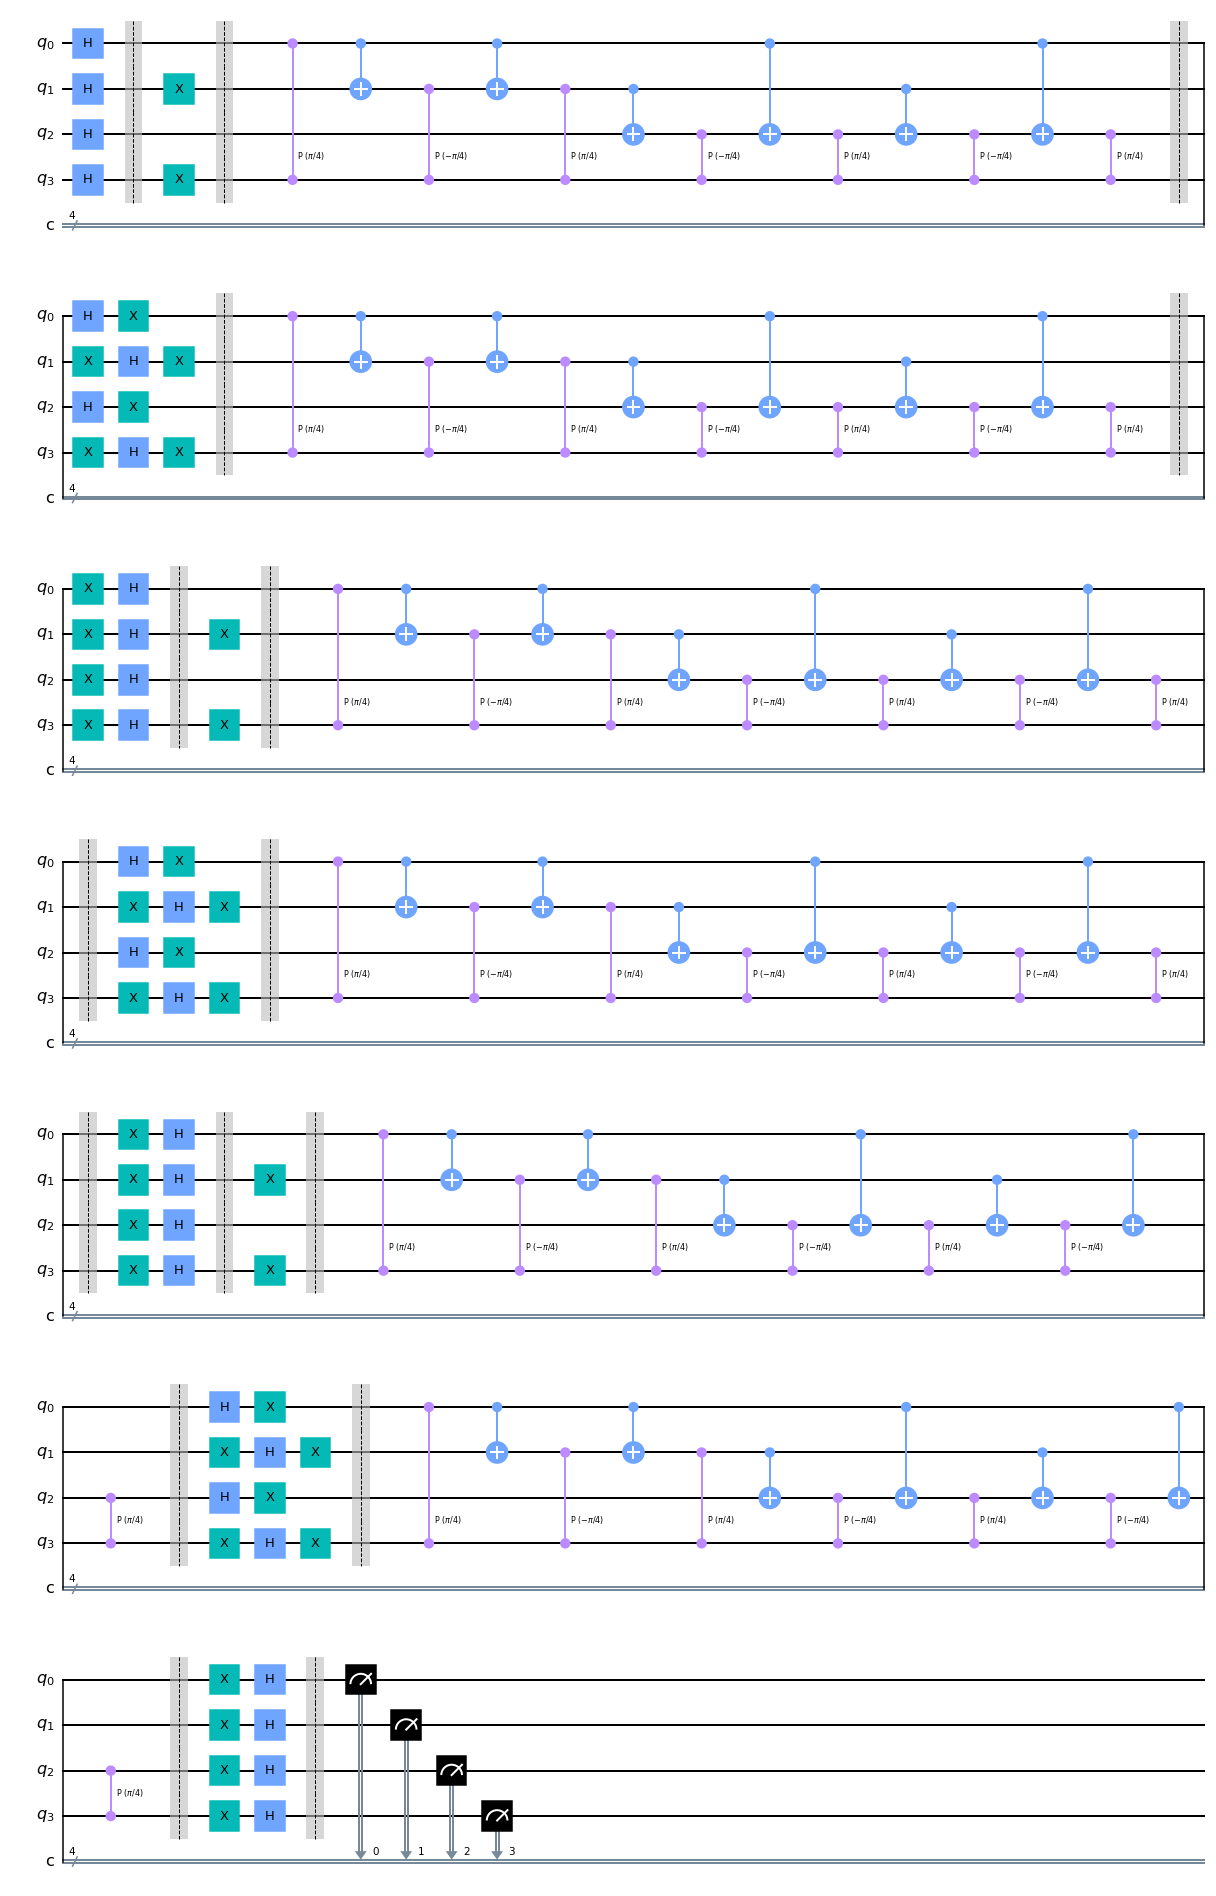

In [36]:
#Ask for an input (will be done by HPC)
print('Enter a value between 0 and 15: ')

#Converting the base ten number to binary
dec = int(input())
num = bin(dec).replace("0b", "")
if dec > 15 or dec < 0:
    print("Try again")
else:
    print("In binary, that is: ", num)

#Making there be four bits
placeholder = num[::-1]
while len(placeholder) < 4:
    placeholder += "0"
num = placeholder[::-1]
print(num)
##########
circuit = QuantumCircuit(4, 4)

#Initialization
circuit.h([0,1,2,3]) 
circuit.barrier([0,1,2,3])

#Oracle and Amplification

oracle(circuit, num)
amplification(circuit)
circuit.barrier([0,1,2,3])
oracle(circuit,num)
amplification(circuit)
circuit.barrier([0,1,2,3])
oracle(circuit,num)
amplification(circuit)
circuit.barrier([0,1,2,3])

#Measures
circuit.measure([0,1,2,3],[0,1,2,3])

#Draw
circuit.draw(output = 'mpl', justify = 'left', initial_state = True)

#Transpile
trans_circuit = transpile(circuit, basis_gates = ['u', 'cx'])
#trans_circuit.draw(output = 'mpl')
circuit.draw(output = 'mpl')

In [41]:
import numpy as np

circuit2 = QuantumCircuit(4,4)
circuit2.h([0,1,2,3])
#
oracle(circuit2, num)
circuit2.h([0,1,2,3])
circuit2.x([0,1,2,3])
cz_3(circuit2)
circuit2.x([0,1,2,3])
circuit2.h([0,1,2,3])
#
oracle(circuit2, num)
circuit2.h([0,1,2,3])
circuit2.x([0,1,2,3])
cz_3(circuit2)
circuit2.x([0,1,2,3])
circuit2.h([0,1,2,3])
#
oracle(circuit2, num)
circuit2.h([0,1,2,3])
circuit2.x([0,1,2,3])
cz_3(circuit2)
circuit2.x([0,1,2,3])
circuit2.h([0,1,2,3])
#
circuit2.measure([0,1,2,3], [0,1,2,3])
print(circuit2.draw())

backend = Aer.get_backend('statevector_simulator')
job = execute(circuit2, backend)
result = job.result()
sv = result.get_statevector()
print(np.around(sv,2))

     ┌───┐      ░                                                           »
q_0: ┤ H ├──────░──■─────────■──────────────■────────────────────────────■──»
     ├───┤┌───┐ ░  │       ┌─┴─┐          ┌─┴─┐                          │  »
q_1: ┤ H ├┤ X ├─░──┼───────┤ X ├─■────────┤ X ├─■─────────■──────────────┼──»
     ├───┤└───┘ ░  │       └───┘ │        └───┘ │       ┌─┴─┐          ┌─┴─┐»
q_2: ┤ H ├──────░──┼─────────────┼──────────────┼───────┤ X ├─■────────┤ X ├»
     ├───┤┌───┐ ░  │P(π/4)       │P(-π/4)       │P(π/4) └───┘ │P(-π/4) └───┘»
q_3: ┤ H ├┤ X ├─░──■─────────────■──────────────■─────────────■─────────────»
     └───┘└───┘ ░                                                           »
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                            ░ ┌───┐┌───┐      ░               »
«q_0: ──────────────────────────■────────────░─┤ H ├┤ X ├────

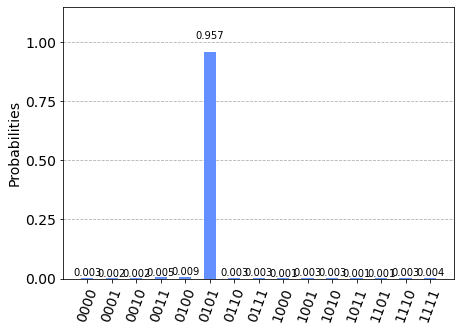

In [43]:
#For running on a simulator
from qiskit import BasicAer, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit2, backend=simulator, shots=1000)
counts = job.result().get_counts()
plot_histogram(counts)
